In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import choices

In [4]:
# directories and files

base_dir = "/kaggle/input/osic-pulmonary-fibrosis-progression/"
train_csv = base_dir + "train.csv"
test_csv = base_dir + "test.csv"

# read train and test files with pandas
train_db = pd.read_csv(train_csv)
test_db = pd.read_csv(test_csv)

print("Shape of training data: ",train_db.shape, "\n")
print(train_db.head(5))

# unique Patient list
patients = train_db.Patient.unique()

# unique Sex list
sexs = train_db.Sex.unique()

# unique SmokingStatus list
status = train_db.SmokingStatus.unique()

# types of data in each column
print("\n",train_db.dtypes)

# for each object type, determine number of unique values
print("\nNumber of unique Patients: ", len(patients))
print("Number of unique Sexs: ", len(sexs))
print("Number of unique Smoking types: ", len(status), "\n")

print("Sexs: ", sexs)
print("Smoking types: ", status, "\n")

# replace Ex-smoker, Currently smokes, and Never smoked with ExSmoker, CurrentlySmokes, and NeverSmoked
train_db.loc[train_db['SmokingStatus'] == 'Ex-smoker', 'SmokingStatus'] = 'ExSmoker'
train_db.loc[train_db['SmokingStatus'] == 'Currently smokes', 'SmokingStatus'] = 'CurrentlySmokes'
train_db.loc[train_db['SmokingStatus'] == 'Never smoked', 'SmokingStatus'] = 'NeverSmoked'

test_db.loc[test_db['SmokingStatus'] == 'Ex-smoker', 'SmokingStatus'] = 'ExSmoker'
test_db.loc[test_db['SmokingStatus'] == 'Currently smokes', 'SmokingStatus'] = 'CurrentlySmokes'
test_db.loc[test_db['SmokingStatus'] == 'Never smoked', 'SmokingStatus'] = 'NeverSmoked'

Shape of training data:  (1549, 7) 

                     Patient  Weeks   FVC    Percent  Age   Sex SmokingStatus
0  ID00007637202177411956430     -4  2315  58.253649   79  Male     Ex-smoker
1  ID00007637202177411956430      5  2214  55.712129   79  Male     Ex-smoker
2  ID00007637202177411956430      7  2061  51.862104   79  Male     Ex-smoker
3  ID00007637202177411956430      9  2144  53.950679   79  Male     Ex-smoker
4  ID00007637202177411956430     11  2069  52.063412   79  Male     Ex-smoker

 Patient           object
Weeks              int64
FVC                int64
Percent          float64
Age                int64
Sex               object
SmokingStatus     object
dtype: object

Number of unique Patients:  176
Number of unique Sexs:  2
Number of unique Smoking types:  3 

Sexs:  ['Male' 'Female']
Smoking types:  ['Ex-smoker' 'Never smoked' 'Currently smokes'] 



In [6]:
# convert data into Xs and Ys

x = []
#y = []


for name in patients:
    x_temp = train_db.loc[train_db.Patient == name]
    for i1, r1 in x_temp.iterrows():
        for i2, r2 in x_temp.iterrows():
            time_change = r2.Weeks - r1.Weeks
            if i1==i2:
                continue
            #elif time_change < -12:
                #continue
            else:
                x_data = [r2.FVC, time_change, r1.FVC, r1.Percent, r1.Age, r1.Sex, r1.SmokingStatus]
                x.append(x_data)
                #y.append(r2.FVC)

x = pd.DataFrame(x, columns = ['FVC_new', 'WeeksChange', 'FVC', 'Percent', 'Age', 'Sex', 'SmokingStatus'])
#y = pd.DataFrame(y, columns = ['FVC_new'])


print(x.shape)
#print(y.shape)

print(x.head(15))

(12158, 7)
    FVC_new  WeeksChange   FVC    Percent  Age   Sex SmokingStatus
0      2214            9  2315  58.253649   79  Male      ExSmoker
1      2061           11  2315  58.253649   79  Male      ExSmoker
2      2144           13  2315  58.253649   79  Male      ExSmoker
3      2069           15  2315  58.253649   79  Male      ExSmoker
4      2101           21  2315  58.253649   79  Male      ExSmoker
5      2000           33  2315  58.253649   79  Male      ExSmoker
6      2064           45  2315  58.253649   79  Male      ExSmoker
7      2057           61  2315  58.253649   79  Male      ExSmoker
8      2315           -9  2214  55.712129   79  Male      ExSmoker
9      2061            2  2214  55.712129   79  Male      ExSmoker
10     2144            4  2214  55.712129   79  Male      ExSmoker
11     2069            6  2214  55.712129   79  Male      ExSmoker
12     2101           12  2214  55.712129   79  Male      ExSmoker
13     2000           24  2214  55.712129   79  Mal

In [56]:
# Split data to train and test sets

from sklearn.model_selection import train_test_split

"""
# check if any nan or empty
print(x.isna().sum(), '\n')
print(y.isna().sum(), '\n')

print(x.isnull().sum(), '\n')
print(y.isnull().sum())
"""

# break off positive and negative WeeksChange
x_pos = x.loc[x['WeeksChange'] > 0]
x_neg = x.loc[x['WeeksChange'] <= 0]

# normalize 'FVC' and 'FVC_new' columns by 'FVC' min and max
maxp = x_pos['FVC'].max()
minp = x_pos['FVC'].min()

xtp1 = (x_pos['FVC'] - minp) / (maxp - minp)
x_pos['FVC'].update(xtp1)

xtp2 = (x_pos['FVC_new'] - minp) / (maxp - minp)
x_pos['FVC_new'].update(xtp2)

# break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(x_pos, x_pos['FVC_new'], train_size=0.8, test_size=0.2, random_state=0)

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(x)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

#print(X_train.head(5))

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [57]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

In [65]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_valid, y_train, y_valid):
    
    # generic numpy array
    gen = np.zeros(5)
    
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    
    X_train = X_train.drop(columns='FVC_new')
    X_valid = X_valid.drop(columns='FVC_new')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        
        if type(y_valid)==type(gen):
            y_train = y_train.ravel()
        else:
            y_train = y_train.values.ravel()
        
        model.fit(X_train, y_train)
        predictions = model.predict(X_valid)
        
        # Metrics
        predictions = predictions.ravel()
        
        if type(y_valid)==type(gen):
            y_valid = y_valid.ravel()
        else:
            y_valid = y_valid.values.ravel()
        
        mae = np.mean(abs(predictions - y_valid))
        rmse = np.sqrt(np.mean((predictions - y_valid) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_valid))
    baseline_rmse = np.sqrt(np.mean((baseline - y_valid) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [67]:
results = evaluate(X_train, X_valid, y_train, y_valid)

print(results)

print('\nThe Gradient Boosted regressor is {:0.2f}% better than the baseline.'.format(
    (100 * abs(results.loc['Gradient Boosted', 'mae'] - results.loc['Baseline', 'mae'])) / results.loc['Baseline', 'mae']))


                             mae       rmse
Linear Regression       0.027203  0.0386521
ElasticNet Regression   0.092641   0.119646
Random Forest           0.019104  0.0265854
Extra Trees            0.0180249  0.0262348
SVM                    0.0834196   0.107833
Gradient Boosted       0.0325988  0.0440623
Baseline                 0.11924    0.15322

The Gradient Boosted regressor is 72.66% better than the baseline.


In [71]:
# Ordinary Least Squares Linear Regression

lr = LinearRegression()
lr.fit(X_train.drop(columns='FVC_new'), y_train.values.ravel())

ols_formula = 'FVC_new = %0.5f +' % lr.intercept_
for i, col in enumerate(X_train.columns[1:]):
    ols_formula += ' %0.5f * %s +' % (lr.coef_[i], col)
    
' '.join(ols_formula.split(' ')[:-1])

'FVC_new = 0.00350 + -0.00060 * WeeksChange + 0.97622 * FVC + -0.00016 * Percent + 0.00035 * Age + 0.00009 * Sex_Female + -0.00009 * Sex_Male + 0.02176 * SmokingStatus_CurrentlySmokes + -0.01009 * SmokingStatus_ExSmoker + -0.01167 * SmokingStatus_NeverSmoked'

In [72]:
# Bayesian Linear Regression

# Formula for Bayesian Linear Regression (follows R formula syntax)
formula = 'FVC_new ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[1:]])
formula


'FVC_new ~ WeeksChange + FVC + Percent + Age + Sex_Female + Sex_Male + SmokingStatus_CurrentlySmokes + SmokingStatus_ExSmoker + SmokingStatus_NeverSmoked'

In [84]:
# Creating a model in PyMC3

import pymc3 as pm

with pm.Model() as normal_model:
    
    # prior for data likelihood is Gaussian (Normal) distribution
    #family = pm.glm.families.Binomial()
    family = pm.glm.families.Normal()
    
    # model requires formula and data (and an optional family, Gaussian is default)
    pm.GLM.from_formula(formula, data=X_train, family=family)
    
    # perform Markov Chain Monte Carlo (MCMC) sampling, PyMC3 chooses the algorithm
    # draws = # of samples, chains = # of Markov chains, tune = # of tuning steps, njobs = ??
    #normal_trace = pm.sample(draws=2000, chains=2, tune=500, init='adapt_diag')
    normal_trace = pm.sample(draws=2000, chains=1, tune=300)

/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0e0035d50>,
      dtype=object)

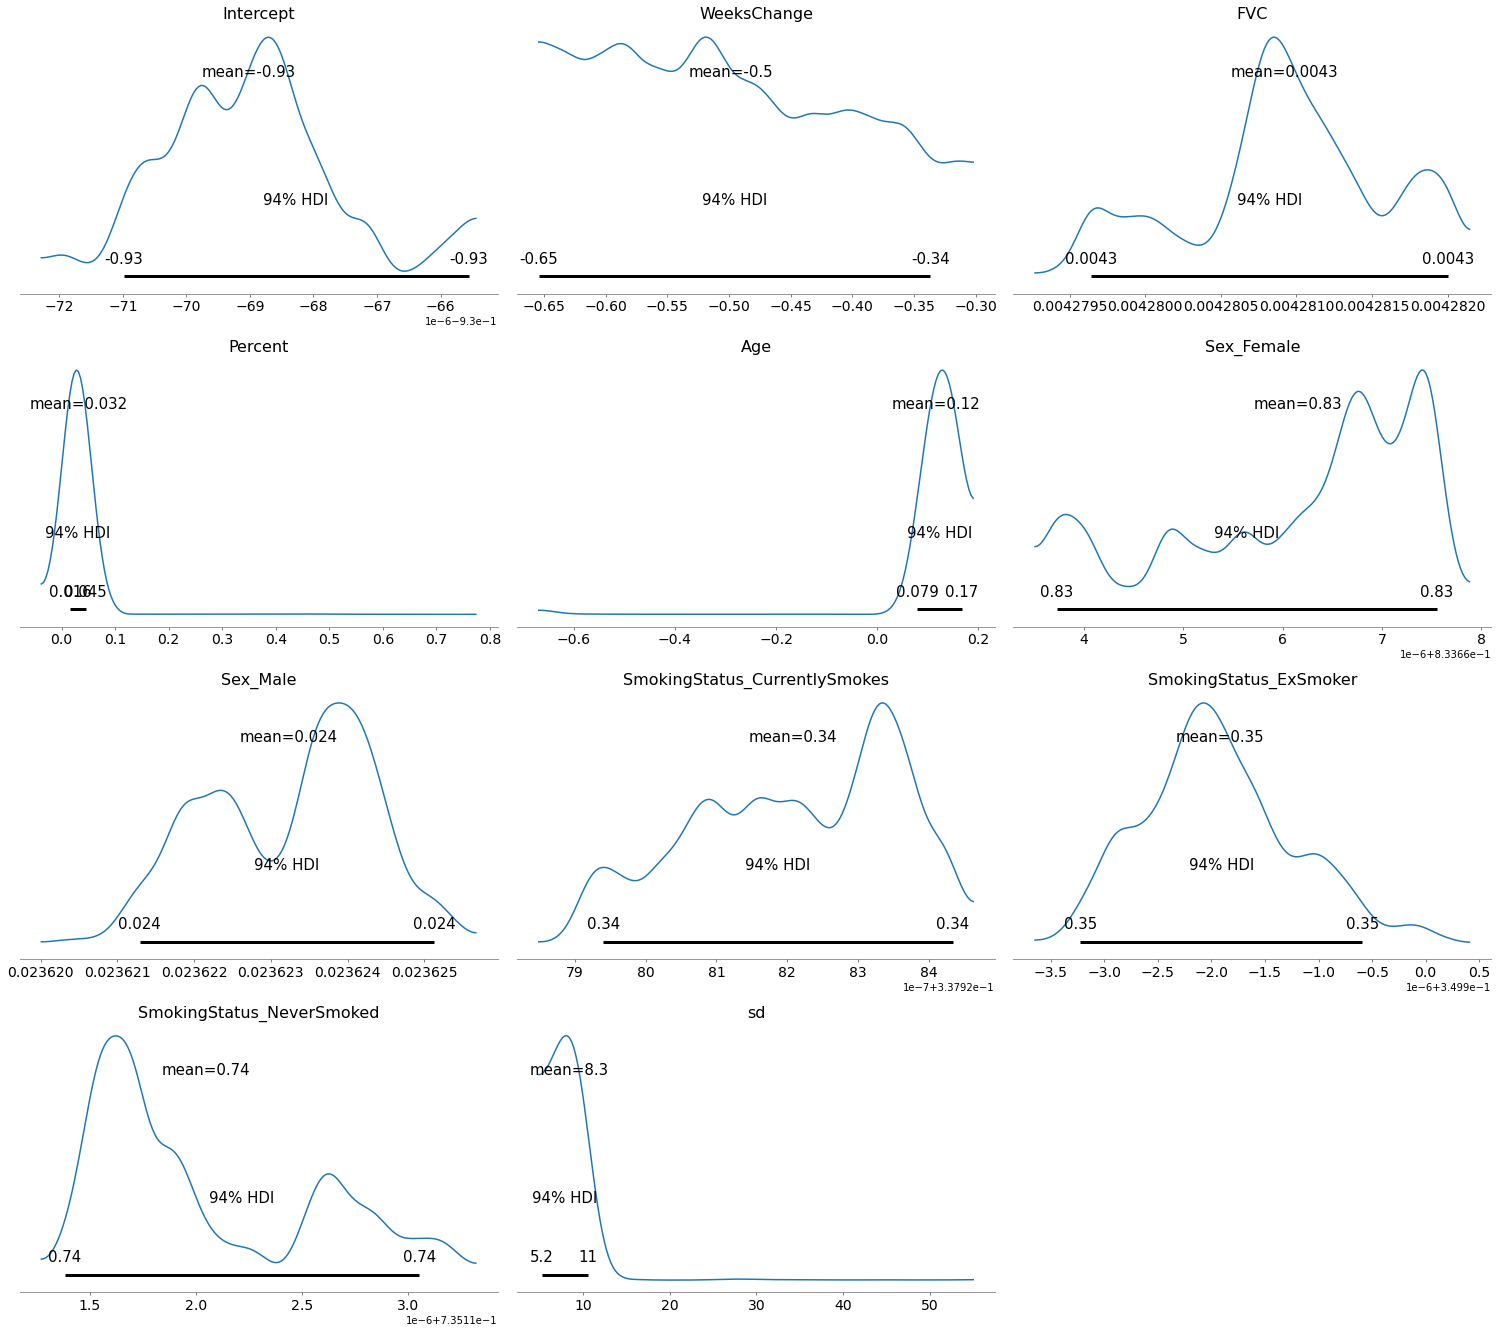

In [85]:
#pm.traceplot(normal_trace)
pm.plot_posterior(normal_trace)

In [86]:
# Print out the mean variable weight from the trace
for variable in normal_trace.varnames:
    print('Variable: {:15} Mean weight in model: {:.9f}'.format(variable,np.mean(normal_trace[variable])))

Variable: Intercept       Mean weight in model: -0.930069027
Variable: WeeksChange     Mean weight in model: -0.498475482
Variable: FVC             Mean weight in model: 0.004280922
Variable: Percent         Mean weight in model: 0.032227126
Variable: Age             Mean weight in model: 0.115046606
Variable: Sex_Female      Mean weight in model: 0.833666154
Variable: Sex_Male        Mean weight in model: 0.023623229
Variable: SmokingStatus_CurrentlySmokes Mean weight in model: 0.337928208
Variable: SmokingStatus_ExSmoker Mean weight in model: 0.349898081
Variable: SmokingStatus_NeverSmoked Mean weight in model: 0.735112047
Variable: sd_log__        Mean weight in model: 2.082343516
Variable: sd              Mean weight in model: 8.313246575


In [87]:
pm.summary(normal_trace)

/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.930,0.000,-0.930,-0.930,0.000,0.000,3.0,3.0,3.0,10.0,NaN
WeeksChange,-0.498,0.098,-0.654,-0.337,0.090,0.095,1.0,1.0,1.0,10.0,NaN
FVC,0.004,0.000,0.004,0.004,0.000,0.000,2.0,2.0,2.0,11.0,NaN
Percent,0.032,0.034,0.016,0.045,0.003,0.002,155.0,146.0,2.0,15.0,NaN
Age,0.115,0.087,0.079,0.167,0.012,0.019,57.0,11.0,2.0,13.0,NaN
Sex_Female,0.834,0.000,0.834,0.834,0.000,0.000,1.0,1.0,2.0,14.0,NaN
Sex_Male,0.024,0.000,0.024,0.024,0.000,0.000,2.0,2.0,2.0,11.0,NaN
SmokingStatus_CurrentlySmokes,0.338,0.000,0.338,0.338,0.000,0.000,2.0,2.0,2.0,12.0,NaN
SmokingStatus_ExSmoker,0.350,0.000,0.350,0.350,0.000,0.000,3.0,3.0,3.0,12.0,NaN
SmokingStatus_NeverSmoked,0.735,0.000,0.735,0.735,0.000,0.000,2.0,2.0,3.0,10.0,NaN


In [89]:
model_formula = 'FVC_new = '
for variable in normal_trace.varnames:
    model_formula += ' %0.6f * %s +' % (np.mean(normal_trace[variable]), variable)

' '.join(model_formula.split(' ')[:-1])

'FVC_new =  -0.930069 * Intercept + -0.498475 * WeeksChange + 0.004281 * FVC + 0.032227 * Percent + 0.115047 * Age + 0.833666 * Sex_Female + 0.023623 * Sex_Male + 0.337928 * SmokingStatus_CurrentlySmokes + 0.349898 * SmokingStatus_ExSmoker + 0.735112 * SmokingStatus_NeverSmoked + 2.082344 * sd_log__ + 8.313247 * sd'

In [90]:
# Evalute the MCMC trace and compare to ml models
def evaluate_trace(trace, X_train, X_test, y_train, y_test, model_results):
    
    # Dictionary of all sampled values for each parameter
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
        
    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Means for all the weights
    var_means = var_weights.mean(axis=0)
    
    # Create an intercept column
    X_test['Intercept'] = 1
    
    # Align names of the test observations and means
    names = X_test.columns[1:]
    X_test = X_test.loc[:, names]
    var_means = var_means[names]
    
    # Calculate estimate for each test observation using the average weights
    results = pd.DataFrame(index = X_test.index, columns = ['estimate'])

    for row in X_test.iterrows():
        results.loc[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))
        
    # Metrics 
    actual = np.array(y_test).ravel()
    errors = results['estimate'] - actual
    mae = np.mean(abs(errors))
    rmse = np.sqrt(np.mean(errors ** 2))
    
    print('Model  MAE: {:.4f}\nModel RMSE: {:.4f}'.format(mae, rmse))
    
    # Add the results to the comparison dataframe
    model_results.loc['Bayesian LR', :] = [mae, rmse]
    
    plt.figure(figsize=(12, 8))
    
    # Plot median absolute percentage error of all models
    ax = plt.subplot(1, 2, 1)
    model_results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'r', ax = ax)
    plt.title('Model Mean Absolute Error Comparison'); plt.ylabel('MAE'); 
    plt.tight_layout()
    
    # Plot root mean squared error of all models
    ax = plt.subplot(1, 2, 2)
    model_results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'b', ax = ax)
    plt.title('Model RMSE Comparison'); plt.ylabel('RMSE')
    
    return model_results

Model  MAE: 6.8432
Model RMSE: 8.1679


,mae,rmse
Linear Regression,0.027203,0.0386521
ElasticNet Regression,0.092641,0.119646
Random Forest,0.019104,0.0265854
Extra Trees,0.0180249,0.0262348
SVM,0.0834196,0.107833
Gradient Boosted,0.0325988,0.0440623
Baseline,0.11924,0.15322
Bayesian LR,6.84318,8.16786


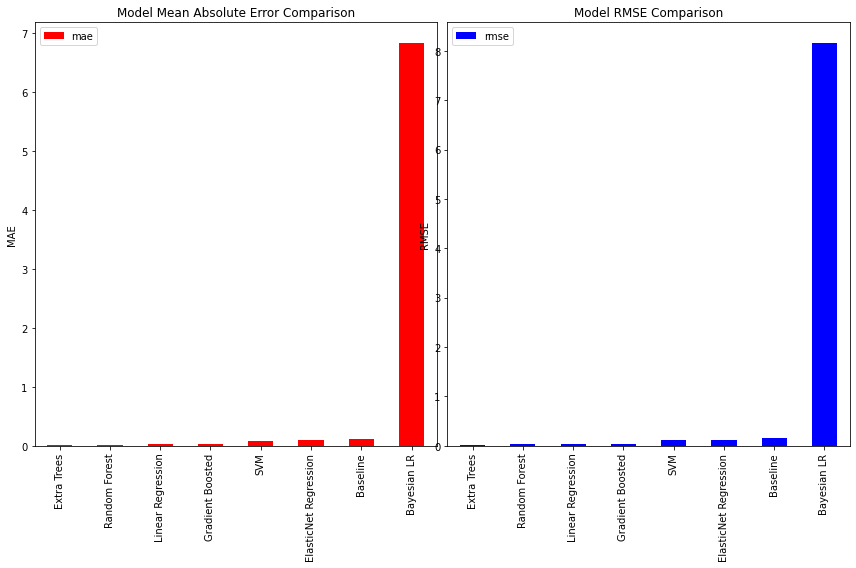

In [91]:
all_model_results = evaluate_trace(normal_trace, X_train, X_valid, y_train, y_valid, results)

all_model_results

In [80]:
import seaborn as sns

# Make a new prediction from the test set and compare to actual value
def test_model(trace, test_observation):
    
    # Print out the test observation data
    print('Test Observation:')
    print(test_observation)
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]

    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Standard deviation of the likelihood
    sd_value = var_weights['sd'].mean()

    # Actual Value
    actual = test_observation['FVC_new']
    
    # Add in intercept term
    test_observation['Intercept'] = 1
    test_observation = test_observation.drop('FVC_new')
    
    # Align weights and test observation
    var_weights = var_weights[test_observation.index]

    # Means for all the weights
    var_means = var_weights.mean(axis=0)

    # Location of mean for observation
    mean_loc = np.dot(var_means, test_observation)
    
    # Estimates of FVC
    estimates = np.random.normal(loc = mean_loc, scale = sd_value,
                                 size = 1000)

    # Plot all the estimates
    plt.figure(figsize=(8, 8))
    sns.distplot(estimates, hist = True, kde = True, bins = 19,
                 hist_kws = {'edgecolor': 'k', 'color': 'darkblue'},
                kde_kws = {'linewidth' : 4},
                label = 'Estimated Dist.')
    # Plot the actual FVC
    plt.vlines(x = actual, ymin = 0, ymax = 5.0, 
               linestyles = '--', colors = 'red',
               label = 'True FVC',
              linewidth = 2.5)
    
    # Plot the mean estimate
    plt.vlines(x = mean_loc, ymin = 0, ymax = 5.0, 
               linestyles = '-', colors = 'orange',
               label = 'Mean Estimate',
              linewidth = 2.5)
    
    plt.legend(loc = 1)
    plt.title('Density Plot for Test Observation');
    plt.xlabel('Normalized FVC'); plt.ylabel('Density');
    
    # Prediction information
    print('True FVC = %d' % actual)
    print('Average Estimate = %0.4f' % mean_loc)
    print('5%% Estimate = %0.4f    95%% Estimate = %0.4f' % (np.percentile(estimates, 5),
                                       np.percentile(estimates, 95)))

Test Observation:
FVC_new                           0.245693
WeeksChange                      20.000000
FVC                               0.282304
Percent                          64.530006
Age                              60.000000
Sex_Female                        0.000000
Sex_Male                          1.000000
SmokingStatus_CurrentlySmokes     0.000000
SmokingStatus_ExSmoker            1.000000
SmokingStatus_NeverSmoked         0.000000
Intercept                         1.000000
Name: 2775, dtype: float64
True FVC = 0
Average Estimate = 0.3137
5% Estimate = 0.2114    95% Estimate = 0.4181


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


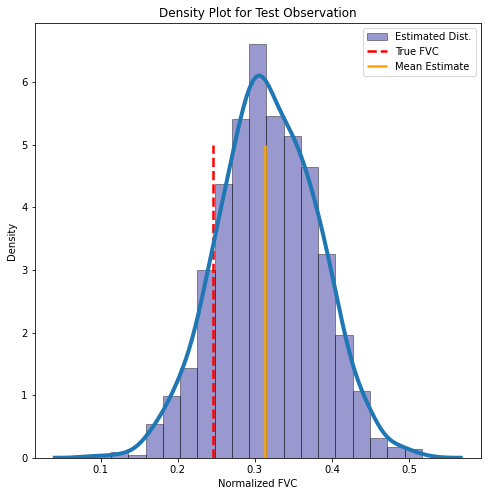

In [83]:
test_model(normal_trace, X_valid.iloc[15])

In [ ]:
# https://github.com/WillKoehrsen/Data-Analysis/blob/master/bayesian_lr/Bayesian%20Linear%20Regression%20Project.ipynb
# https://towardsdatascience.com/bayesian-linear-regression-in-python-using-machine-learning-to-predict-student-grades-part-2-b72059a8ac7e